In [12]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as m

# Read original CSV
rym = pd.read_csv("rym.csv")
print(rym.head())

   RYM Album  First Name    Last Name  First Name localized  \
0    3182509         NaN        Adele                   NaN   
1   13005983         The    Alchemist                   NaN   
2    7439765         The   Avalanches                   NaN   
3         63         The   Beach Boys                   NaN   
4    2548617         NaN  Beach House                   NaN   

    Last Name localized               Title  Release_Date  Rating Ownership  \
0                   NaN                  21          2011       9         n   
1                   NaN  This Thing of Ours          2021       7         n   
2                   NaN          Wildflower          2016       8         n   
3                   NaN          Pet Sounds          1966       8         n   
4                   NaN          Teen Dream          2010       7         n   

   Purchase Date  Media Type Review  
0            NaN         NaN     ""  
1            NaN         NaN     ""  
2            NaN         NaN    

In [13]:
# Select main columns from rym
rym_key = rym[[" First Name", "Last Name", "Title", "Release_Date", "Rating"]]
rym_key.columns = ["First", "Last", "Title", "Year", "Rating"]

# Merge First and Last names into one string under "Full" column
full_names = []
for ind, row in rym_key.iterrows():
    if str(row["First"]) == "nan":
        full_names.append(str(row["Last"]))
    elif str(row["Last"]) == "nan":
        full_names.append(str(row["First"]))
    else:
        full_names.append(str(row["First"]) + " " + str(row["Last"]))
rym_key = rym_key.assign(Full=full_names)

# Modify rym_key to only include Full Name, Title, Year and Rating
rym_key = rym_key[["Full", "Title", "Year", "Rating"]]
print(rym_key.head())

             Full               Title  Year  Rating
0           Adele                  21  2011       9
1   The Alchemist  This Thing of Ours  2021       7
2  The Avalanches          Wildflower  2016       8
3  The Beach Boys          Pet Sounds  1966       8
4     Beach House          Teen Dream  2010       7


In [34]:
# Stats not including ratings of 0
print(rym_key[rym_key["Rating"] != 0].describe())

              Year      Rating
count   323.000000  323.000000
mean   2013.925697    7.148607
std       9.933665    1.635084
min    1966.000000    1.000000
25%    2012.000000    6.000000
50%    2018.000000    7.000000
75%    2020.000000    8.000000
max    2022.000000   10.000000


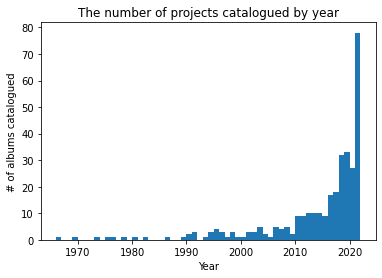

In [24]:
# We can now visualize the data. First, let us visualize the distribution of albums by year:

plt.hist(rym_key["Year"], rym_key["Year"].max() - rym_key["Year"].min())
plt.title("The number of projects catalogued by year")
plt.xlabel("Year")
plt.ylabel("# of albums catalogued")
plt.show()